### SIR Model

The SIR model is a differential equation model described by the following equations

$$\begin{array}{rcl}
    \frac{dS}{dt} &=& - \beta \left( \frac{SI}{N}\right) \\\\
    \frac{dI}{dt} &=& \beta \left( \frac{SI}{N}\right) - \gamma I \\\\
    \frac{dR}{dt} &=& \gamma I
\end{array}$$

where $S$, $I$ and $R$ are the number of persons in the community that are susceptible, infectious, and recovered, respectively. 

Let's gather all the stuff on the right hand sides of the the equal signs into functions so that

$$\begin{array}{rcl}
    \frac{dS}{dt} &=& f(S,I,R,\beta,\gamma, N) \\\\
    \frac{dI}{dt} &=& g(S,I,R,\beta,\gamma, N) - \gamma I \\\\
    \frac{dR}{dt} &=& h(S,I,R,\beta,\gamma, N)
\end{array}$$


In [1]:
################################
# Functions used in SIR Model ##
################################
def f(s,i,r,beta,gamma,N): 
    # From dS/dt equation
    return -beta*i*s/N 
def g(s,i,r,beta,gamma,N): 
    # From dI/dt equation
    return beta*i*s/N - gamma*i
def h(s,i,r,beta,gamma,N): 
    # From dR/dt equation
    return gamma*i

Define the SIR model parameters

In [2]:
#########################
# SIR model parameters ##
#########################
N = 1000        # Population size
beta = .4       # Play with .2, .4, .8, .99 in class
gamma = .1      # Rate at which infectious individuals recover
dt = 0.1        # Numerical integration time step
duration = 140  # Simulation duration 

Set up the initial populations

In [3]:
#########################################
# Initialize states of the population
#########################################
S: list[float] = [N-1]
I: list[float] = [1]
R: list[float] = [0]
t: list[float] = [0]

Define a function to perform Euler integration, which approximates the behavior of a differential equation by saying that

$$x(t+\Delta t) \approx x(t) + \Delta t \frac{dx}{dt}$$

In [4]:
from typing import Tuple
# Note that I'm using global variables. Bad Mike!
def euler_integration(s: float, 
                      i: float,
                      r: float) -> Tuple[float, float, float]:
    s_next: float = s + dt * f(s, i, r, beta, gamma, N)
    i_next: float = i + dt * g(s, i, r, beta, gamma, N)
    r_next: float = r + dt * h(s, i, r, beta, gamma, N)
    return (s_next, i_next, r_next)

Run the simulation and append all the values into lists

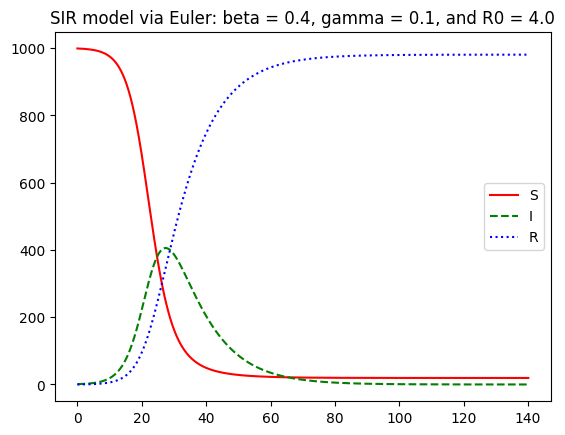

In [6]:
import matplotlib.pyplot as plt

def run_and_plot() -> None:
    while t[-1] < duration:
        s_next, i_next, r_next = euler_integration(S[-1], I[-1], R[-1])
        S.append(s_next)
        I.append(i_next)
        R.append(r_next)
        t.append(t[-1]+dt)

    plt.plot(t,S,'r',t,I,'g--',t,R,'b:')
    plt.legend(['S','I','R'])
    title = 'SIR model via Euler: beta = ' + str(beta) + ', gamma = ' + str(gamma) + ', and R0 = ' + str(beta/gamma)
    plt.title(title)

run_and_plot()
